In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import nibabel as nb

# Let's create a short helper function to plot 3D NIfTI images
def plot_slice(fname):

    # Load the image
    img = nb.load(fname)
    data = img.get_data()

    # Cut in the middle of the brain
    cut = int(data.shape[-1]/2) + 10

    # Plot the data
    imshow(np.rot90(data[..., cut]), cmap="gray")
    gca().set_axis_off()

In [8]:
%%bash
ANAT_NAME=sub-01_T1w
DPATH=/home/bhaskard/myfolders/fmri/datasets/ds000007_R2.0.1/sub-01/anat
ANAT=${DPATH}/${ANAT_NAME}
bet ${ANAT} ${DPATH}/output/${ANAT_NAME}_brain -m -f 0.3
fslmaths ${ANAT} -s 2 ${DPATH}/output/${ANAT_NAME}_smooth
fslmaths ${DPATH}/output/${ANAT_NAME}_smooth -mas ${DPATH}/output/${ANAT_NAME}_brain_mask ${DPATH}/output/${ANAT_NAME}_smooth_mask

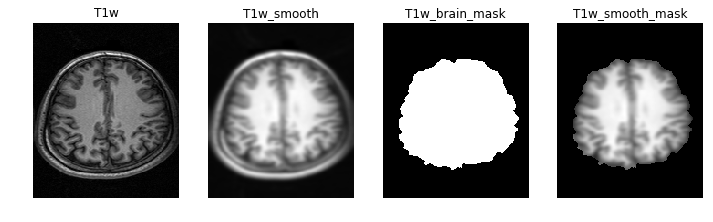

In [9]:
f = plt.figure(figsize=(12, 4))
for i, img in enumerate(["T1w", "T1w_smooth",
                         "T1w_brain_mask", "T1w_smooth_mask"]):
    f.add_subplot(1, 4, i + 1)
    if i == 0:
        plot_slice("/home/bhaskard/myfolders/fmri/datasets/ds000007_R2.0.1/sub-01/anat/output/sub-01_%s.nii.gz" % img)
    else:
        plot_slice("/home/bhaskard/myfolders/fmri/datasets/ds000007_R2.0.1/sub-01/anat/output/sub-01_%s.nii.gz" % img)
    plt.title(img)